In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Assignment_Dataset.csv")

In [4]:
df.head()

,Date,GHI,PR
0,01-07-2019,3.256608,69.575676
1,02-07-2019,3.976767,79.314411
2,03-07-2019,2.811867,61.020006
3,04-07-2019,3.658408,83.262576
4,05-07-2019,5.590683,82.124440


In [5]:
df.tail()

,Date,GHI,PR
977,20-03-2022,4.226183,81.632738
978,21-03-2022,3.431675,71.057353
979,22-03-2022,3.580492,81.631509
980,23-03-2022,4.997617,71.906149
981,24-03-2022,5.125050,79.911798


In [6]:
null_counts = df.isnull().sum()

In [7]:
print(null_counts)

Date    0
GHI     0
PR      0
dtype: int64


In [8]:
df.describe()

,GHI,PR
count,982.000000,982.000000
mean,4.638348,72.733869
std,1.011496,7.321776
min,1.413825,60.023886
25%,4.023204,66.287163
50%,4.751262,72.931286
75%,5.309556,79.158463
max,6.947317,84.980120


In [9]:
avg_7d = df['PR'].tail(7).mean()

avg_30d = df['PR'].tail(30).mean()

avg_60d = df['PR'].tail(60).mean()

avg_90d = df['PR'].tail(90).mean()

avg_365d = df['PR'].tail(365).mean()

avg_overall = df['PR'].mean()

print(avg_7d," ",avg_30d," ",avg_60d," ",avg_90d," ",avg_365d," ", avg_overall)


73.80366172428572   71.85599481666668   73.00926396499997   73.05061490655555   72.8832529999178   72.73386933146641


In [10]:
df['Rolling_Average_PR'] = df['PR'].rolling(window=30).mean()

In [11]:
df

,Date,GHI,PR,Rolling_Average_PR
0,01-07-2019,3.256608,69.575676,NaN
1,02-07-2019,3.976767,79.314411,NaN
2,03-07-2019,2.811867,61.020006,NaN
3,04-07-2019,3.658408,83.262576,NaN
4,05-07-2019,5.590683,82.124440,NaN
...,...,...,...,...
977,20-03-2022,4.226183,81.632738,71.181262
978,21-03-2022,3.431675,71.057353,70.789540
979,22-03-2022,3.580492,81.631509,71.231840
980,23-03-2022,4.997617,71.906149,71.249772


In [12]:
import matplotlib.dates as mdates



In [13]:
df.head()

,Date,GHI,PR,Rolling_Average_PR
0,01-07-2019,3.256608,69.575676,NaN
1,02-07-2019,3.976767,79.314411,NaN
2,03-07-2019,2.811867,61.020006,NaN
3,04-07-2019,3.658408,83.262576,NaN
4,05-07-2019,5.590683,82.124440,NaN


In [14]:
df['Rolling_Average_PR']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
977    71.181262
978    70.789540
979    71.231840
980    71.249772
981    71.855995
Name: Rolling_Average_PR, Length: 982, dtype: float64

In [15]:
# Generate the sequence of dates
#for the green line

start_date = pd.to_datetime('01-07-2019', format='%d-%m-%Y')
end_date = pd.to_datetime('24-03-2022', format='%d-%m-%Y')
num_years = end_date.year - start_date.year

# Generate the corresponding y-values
initial_value = 73.9
decrease_per_year = 0.008  # 0.8% expressed as a decimal
y_values = [initial_value * (1 - decrease_per_year) ** i for i in range(num_years)]


# Add the decreasing values as a new column to the existing DataFrame
print(y_values)
df['Target_B'] = 0

leng=len(df['PR'])

##
import datetime

j = 0
i = 0
start_date = datetime.datetime.strptime("01-07-2019", "%d-%m-%Y")
temp_date =start_date
while j < leng:
    date_str = df.loc[j, 'Date']  # 'Date' is the column name in dataframe
    date = datetime.datetime.strptime(date_str, "%d-%m-%Y")
    
    if date <= start_date + datetime.timedelta(days=365):
        df.loc[j, 'Target_B'] = y_values[i]  # y_value is defined and has an appropriate value
        j += 1
    else:
        start_date = date
        i += 1



count = len(df[df['PR'] > df['Target_B']])
print(count)

total_pt_abv_T_Pr = count/ (len(df['PR']))*100
print(total_pt_abv_T_Pr)


[73.9, 73.3088, 72.7223296]
478
48.676171079429736


In [16]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

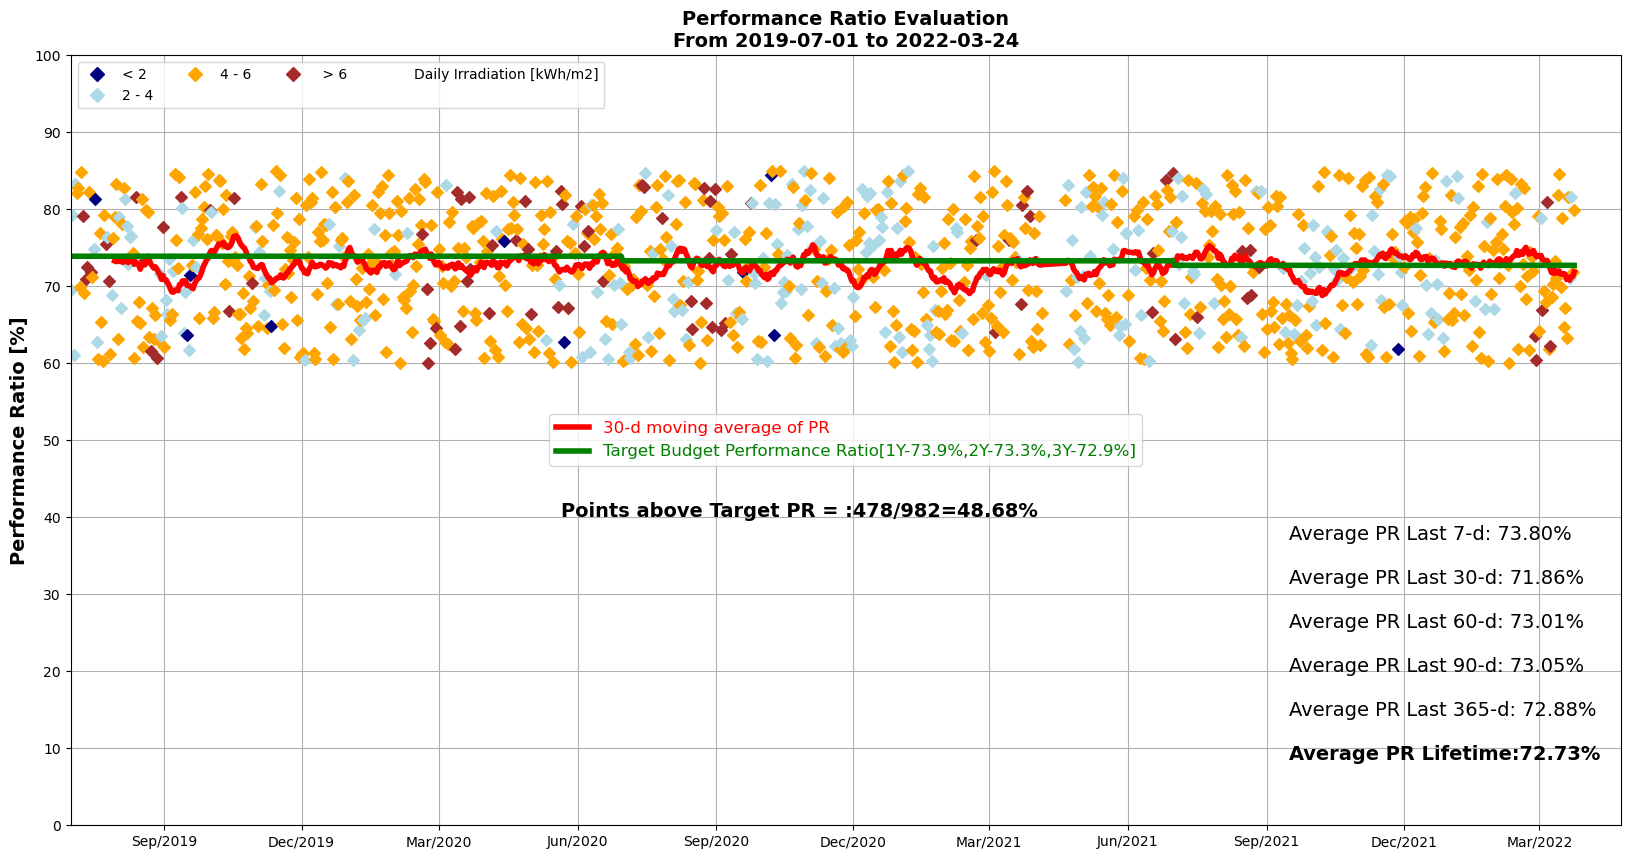

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# dataset is stored in a DataFrame called 'df' with columns 'Date', 'PR', 'GHI', and 'Rolling_Average_PR'

# Convert 'Date' column to datetime if it's not already in datetime format
date = pd.to_datetime(df['Date'], format='%d-%m-%Y')
dates = mdates.date2num(date)

plt.figure(figsize=(20, 10))

plt.title("Performance Ratio Evaluation\nFrom 2019-07-01 to 2022-03-24", fontweight='bold', fontsize=14)

for date, pr, ghi in zip(dates, df['PR'], df['GHI']):
    if ghi < 2:
        color = 'navy'
        marker = 'D'  # Diamond shape for ghi < 2
    elif ghi < 4:
        color = 'lightblue'
        marker = 'D'  # Diamond shape for 2 <= ghi < 4
    elif ghi < 6:
        color = 'orange'
        marker = 'D'  # Diamond shape for 4 <= ghi < 6
    else:
        color = 'brown'
        marker = 'D'  # Diamond shape for ghi >= 6
    plt.scatter(date, pr, color=color, marker=marker)

# Setting up the x-axis 
start_date = mdates.datestr2num('2019-07-01')
end_date = mdates.datestr2num('2022-04-24')
plt.xlim(start_date, end_date)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Plotting the red line for 'Rolling_Average_PR'
l1=plt.plot(dates, df['Rolling_Average_PR'], color='red', linestyle='-', linewidth=4,label="30-d moving average of PR")


#Plotting the green line 
l2=plt.plot(dates, df['Target_B'], color='green', linestyle='-', linewidth=4,label="Target Budget Performance Ratio[1Y-73.9%,2Y-73.3%,3Y-72.9%]")

#adding the text for Averge PR
# Adding the text on the bottom right corner
average_text = f"Average PR Last 7-d: {avg_7d:.2f}%        \n\nAverage PR Last 30-d: {avg_30d:.2f}%      \n\nAverage PR Last 60-d: {avg_60d:.2f}%      \n\nAverage PR Last 90-d: {avg_90d:.2f}%      \n\nAverage PR Last 365-d: {avg_365d:.2f}%    \n\n"
plt.text(end_date,8 , average_text, horizontalalignment='right', verticalalignment='bottom',fontsize=14)

avg_text=f"Average PR Lifetime:{avg_overall:.2f}%   "
plt.text(end_date,8,avg_text,horizontalalignment='right', verticalalignment='bottom' ,fontsize=14,fontweight='bold')

pt_abv_TB=f"\n\n\nPoints above Target PR = :{count}/{len(df['PR'])}={total_pt_abv_T_Pr:.2f}%"
plt.text(0.47,0.45,pt_abv_TB,horizontalalignment='center', verticalalignment='center' ,fontsize=14,fontweight='bold', transform=plt.gca().transAxes)

# Setting up the grid
plt.gca().set_axisbelow(True)
plt.grid(True, linestyle='-')

# Setting up the y-axis
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.ylabel('Performance Ratio [%]', fontweight='bold', fontsize='14')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))

#working with legends

# Create the first legend
legend1 = plt.legend(loc='center',fontsize = 'large')
legend1.get_texts()[0].set_color('red')
legend1.get_texts()[1].set_color('green')
plt.gca().add_artist(legend1)




legend_handles = [
   
    mlines.Line2D([], [], color='navy', marker='D', markersize=7, label='< 2', linestyle='None'),
    mlines.Line2D([], [], color='lightblue', marker='D', markersize=7, label='2 - 4', linestyle='None'),
    mlines.Line2D([], [], color='orange', marker='D', markersize=7, label='4 - 6', linestyle='None'),
    mlines.Line2D([], [], color='brown', marker='D', markersize=7, label=' > 6', linestyle='None'),
    mlines.Line2D([],[], label= 'Daily Irradiation [kWh/m2]',linestyle='None')

]


plt.legend(handles=legend_handles,loc='upper left', bbox_to_anchor=(0, 1), ncol=4)

plt.show()


In [18]:
plt.savefig('graph.png')

<Figure size 640x480 with 0 Axes>